In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.9 MB/s eta 0:00:00


In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r'/content/nestle.csv', parse_dates = True)

In [ ]:
df.head(10)

,Date,Open Price,High_Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-Apr-22,18150.00,18572.95,17772.90,18205.80,18130.18344,4590,1770,83217542,950.0,20.70,800.05,55.80
1,20-Apr-22,18100.10,18415.00,18017.15,18313.70,18295.55907,6069,1321,111035748,4677.0,77.06,397.85,213.60
2,19-Apr-22,18470.05,18718.00,17845.60,17943.15,18355.09332,2904,716,53303191,1619.0,55.75,872.40,-526.90
3,18-Apr-22,18294.50,18684.50,18294.50,18549.85,18511.22460,1496,586,27692792,557.0,37.23,390.00,255.35
4,13-Apr-22,18371.20,18549.30,18248.25,18343.90,18388.96783,1150,550,21147313,573.0,49.83,301.05,-27.30
5,12-Apr-22,18339.00,18497.00,18216.30,18430.00,18390.22200,2000,537,36780444,1412.0,70.60,280.70,91.00
6,11-Apr-22,18499.00,18518.35,18225.00,18422.70,18385.86236,712,364,13090734,305.0,42.84,293.35,-76.30
7,08-Apr-22,18180.00,18500.00,18101.00,18431.10,18361.67753,1197,514,21978928,534.0,44.61,399.00,251.10
8,07-Apr-22,18198.60,18245.95,17986.75,18175.55,18131.79956,918,357,16644992,240.0,26.14,259.20,-23.05
9,06-Apr-22,17900.00,18255.35,17871.20,18207.60,18096.24354,813,397,14712246,341.0,41.94,384.15,307.60


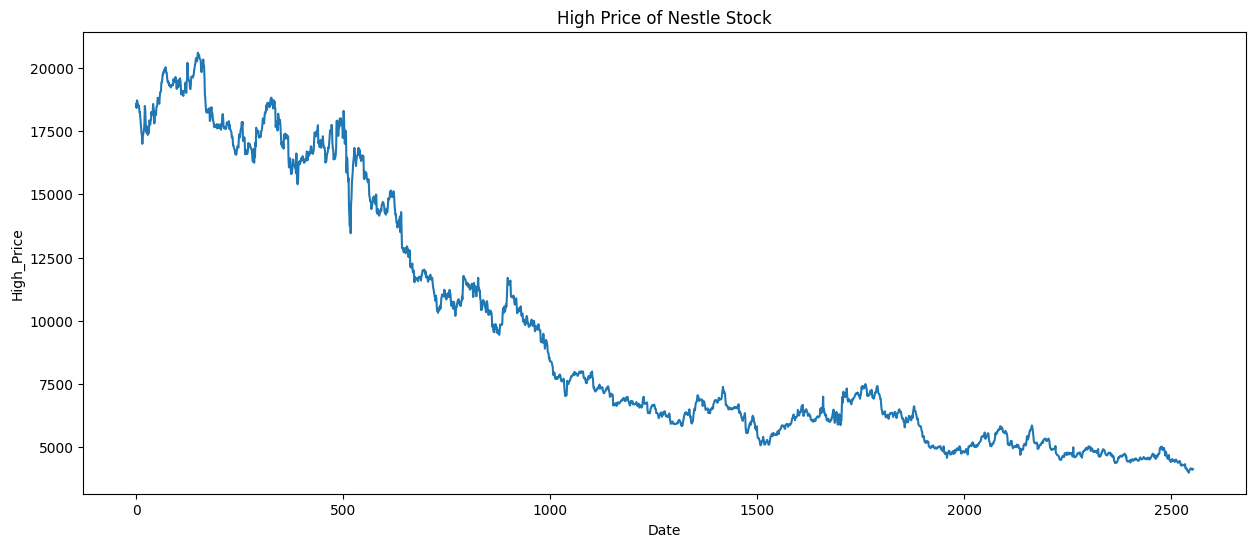

In [ ]:
df["High_Price"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("High_Price")
plt.title("High Price of Nestle Stock")
plt.show()

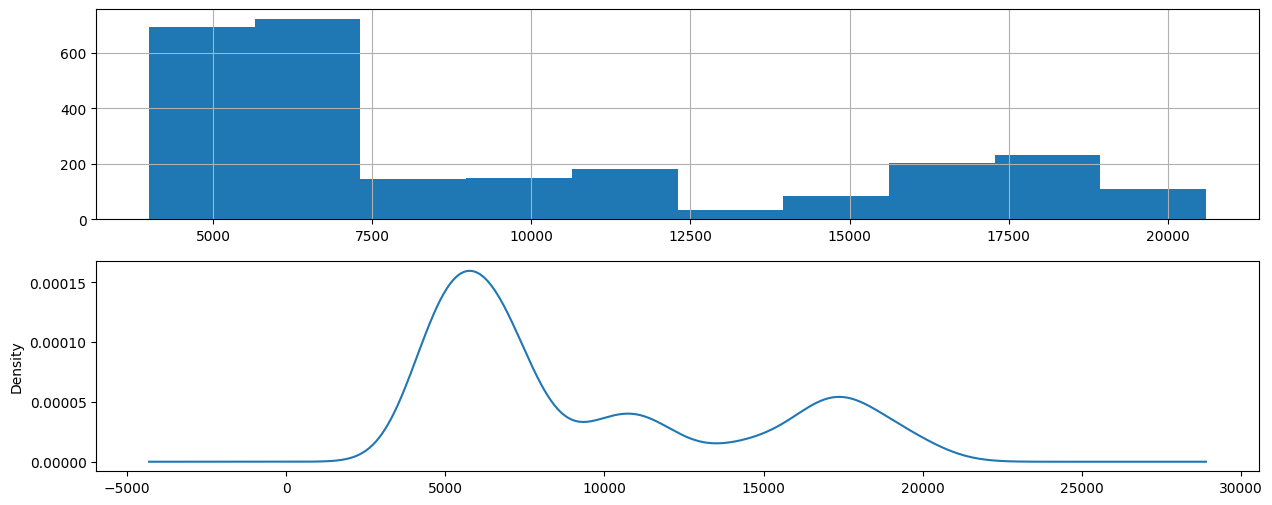

In [ ]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["High_Price"].hist()
plt.subplot(212)
df["High_Price"].plot(kind='kde')
plt.show()

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['High_Price' ],'High_Price')

Results of Dickey-Fuller Test for column: High_Price
Test Statistic                   -1.284840
p-value                           0.636079
No Lags Used                     24.000000
Number of Observations Used    2528.000000
Critical Value (1%)              -3.432939
Critical Value (5%)              -2.862684
Critical Value (10%)             -2.567379
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
X = df[['High_Price' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
stepwise_model = auto_arima(train,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=False,
    d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32340.226, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32336.249, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32338.223, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32338.223, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32337.963, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.543 seconds


In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2523
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -16166.124
Date:                Mon, 23 Oct 2023   AIC                          32336.249
Time:                        04:46:19   BIC                          32347.914
Sample:                             0   HQIC                         32340.482
                               - 2523                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -5.6475      2.969     -1.902      0.057     -11.466       0.171
sigma2      2.164e+04    230.329     93.944      0.000    2.12e+04    2.21e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             16266.02
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast,conf_int = stepwise_model.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['high_pred'])

In [ ]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(1229, 1259)
df_conf = df_conf.set_index("new_index")

In [ ]:
forecast["new_index"] = range(1229, 1259)
forecast = forecast.set_index("new_index")

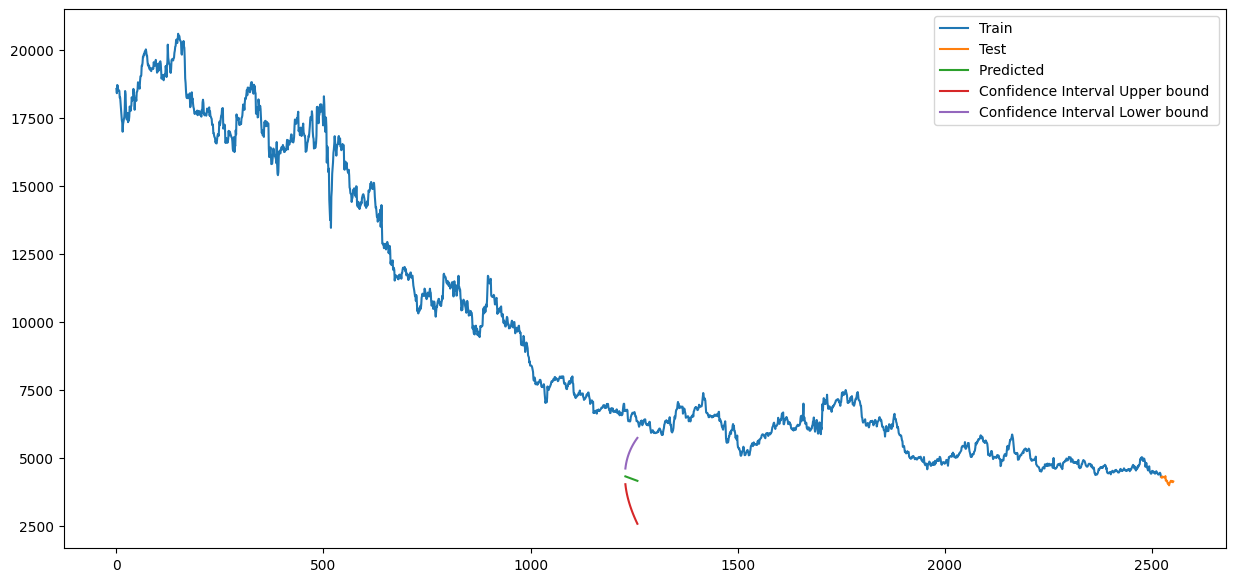

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

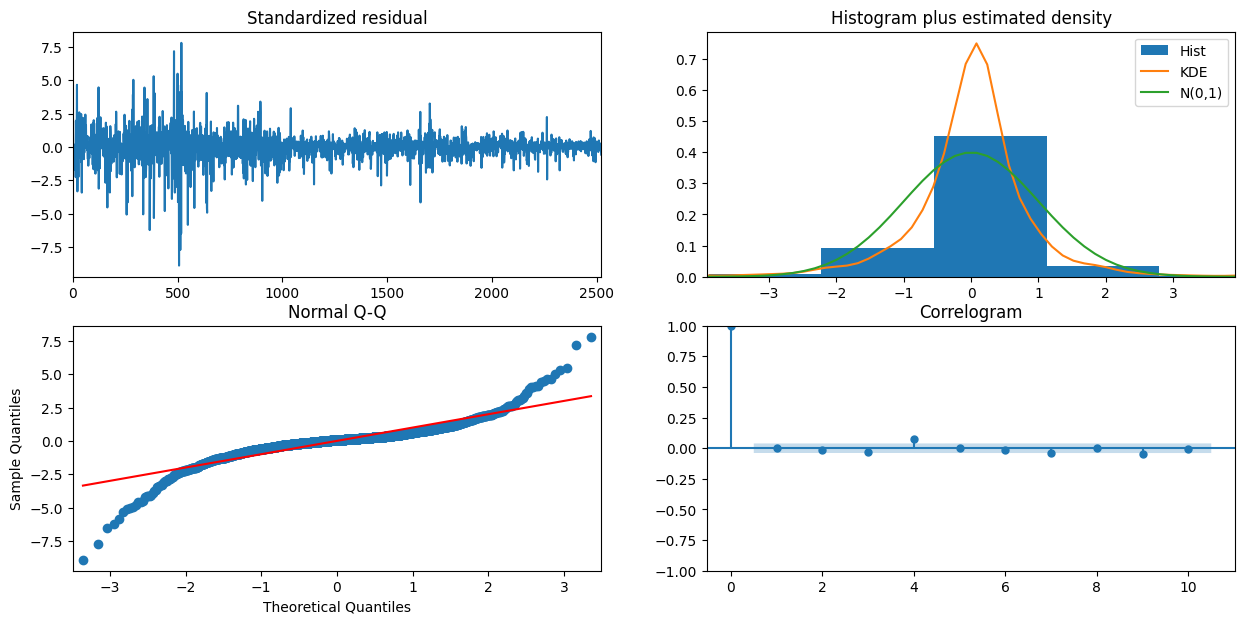

In [ ]:
stepwise_model.plot_diagnostics();

In [ ]:
forecast

,high_pred
new_index,
1229,4324.352518
1230,4318.705036
1231,4313.057554
1232,4307.410071
1233,4301.762589
1234,4296.115107
1235,4290.467625
1236,4284.820143
1237,4279.172661
